In [3]:
%%capture

import os

import numpy as np
import matplotlib.pylab as plt

from tvb.simulator.lab import *

In [34]:
conn = connectivity.Connectivity.from_file( os.path.abspath('dataset/connectivity_76.zip'))

# configure stimulus spatial pattern
weighting = np.zeros((76, ))
weighting[[0, 7, 13, 33, 42]] = np.array([2.0 ** -2, 2.0 ** -3, 2.0 ** -4, 2.0 ** -5, 2.0 ** -6])

# temporal profile
eqn_t = equations.Gaussian()
eqn_t.parameters["midpoint"] = 25000.0
eqn_t.parameters["sigma"] = 200.0

stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=conn,
                                  weight=weighting)

sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=np.array([0.5])),
    connectivity=conn,
    coupling=coupling.Linear(a=np.array([0.0126])),
    integrator=integrators.HeunDeterministic(dt=0.5),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        monitors.Bold(period=500),
        monitors.ProgressLogger(period=5e3),
        ),
    stimulus=stimulus,
    simulation_length=60e3, # 1 minute simulation
).configure()

(tavg_time, tavg_data), (bold_time, bold_data), _ = sim.run()

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration
   INFO  step 1 time 0.0005 s
   INFO  step 10001 time 5.0005 s
   INFO  step 20001 time 10.0005 s
   INFO  step 30001 time 15.0005 s
   INFO  step 40001 time 20.0005 s
   INFO  step 50001 time 25.0005 s
   INFO  step 60001 time 30.0005 s
   INFO  step 70001 time 35.0005 s
   INFO  step 80001 time 40.0005 s
   INFO  step 90001 time 45.0005 s
   INFO  step 100001 time 50.0005 s
   INFO  step 110001 time 55.0005 s


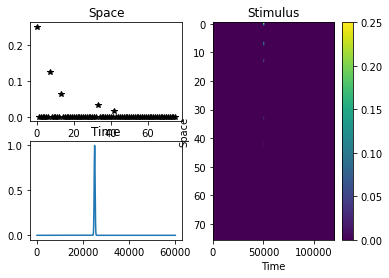

In [57]:
plot_pattern(sim.stimulus)

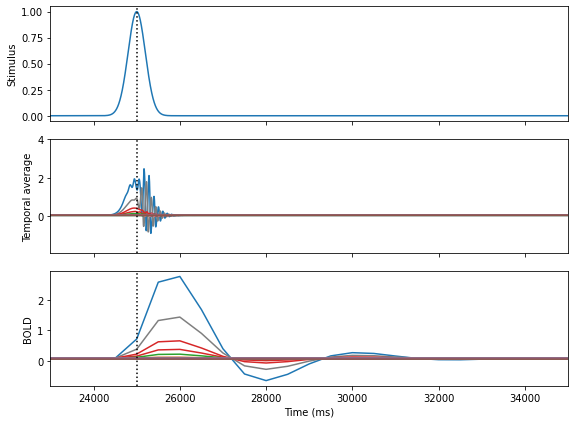

In [55]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(8,6))

t0=23000 # ms
t1=35000 # ms

ax = axs[0]
ax.plot(sim.stimulus.time[0,], sim.stimulus.temporal_pattern[0])
ax.set(ylabel="Stimulus")

ax = axs[1]
ax.plot(tavg_time, tavg_data[:, 0, :, 0])
ax.set(ylabel="Temporal average")

ax = axs[2]
ax.plot(bold_time, bold_data[:, 0, :, 0])
ax.set(ylabel="BOLD", xlabel='Time (ms)', xlim=[t0,t1])


for ax in axs:
    ax.axvline(x=25000, c='k', ls=':')

fig.tight_layout()